# Importing Required Library

In [388]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [389]:
df=pd.read_csv('insurance.csv') 

In [390]:
df.head()  # using head for checking data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## In Data Analysis We wil Analysis To find out the Below Stuff
1.Missing values

2.All the numerical Variables

3.Distribution of the Numerical Variables

4.Categorical Variables

5.Outliers

6.Relationship between Indipendent and Dependent features(expenses)

# Data Analysis

In [391]:
pd.DataFrame(df.shape,index=['Row','Column'],columns=[1]) # checking the shape of the data

,1
Row,1338
Column,7


 - There are  1339 Rows and 7 Columns in this Dataset.

In [392]:
df.info() # Checking the  basic information of data sets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Five Point Summary for Numerical Variables

In [393]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [394]:
df_cat=df.select_dtypes(include='object').columns#Finding the numericalvariables.
df_num=df.select_dtypes(exclude='object').columns#Finding the catogorical variables.

In [395]:
pd.Series(df_num)

0         age
1         bmi
2    children
3    expenses
dtype: object

In [396]:
df_cat

Index(['sex', 'smoker', 'region'], dtype='object')

 - Above we can see we have 4 numerical  and 3 categorical columns.

In [397]:
df.dtypes.to_frame('Data_Type') # Checking he data type.

,Data_Type
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
expenses,float64


## Missing values

In [398]:
df.isnull().sum().to_frame('Missing Count') # Checking the null values.

,Missing Count
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


 - As we can see there are no null values in the dataset.
 - We can visulize the null value with the help of heatmap.

#  Categorical Analysis

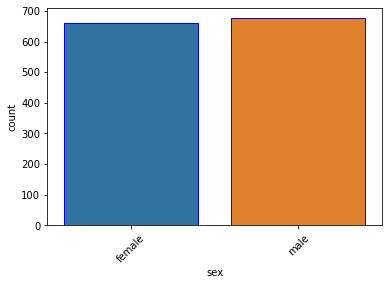

In [399]:
#sex
sns.countplot(df['sex'],edgecolor='blue')
plt.xticks(rotation=45)
plt.show()

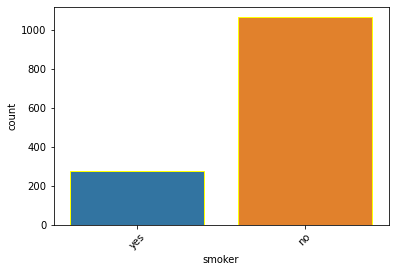

In [400]:
#smoker
sns.countplot(df['smoker'],edgecolor='yellow')
plt.xticks(rotation=45)
plt.show()

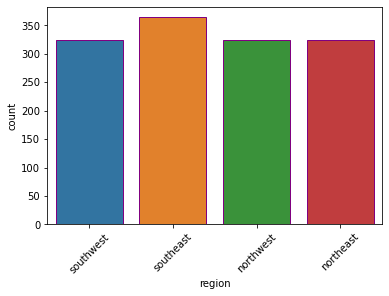

In [401]:
#region
sns.countplot(df['region'],edgecolor='purple')
plt.xticks(rotation=45)
plt.show()

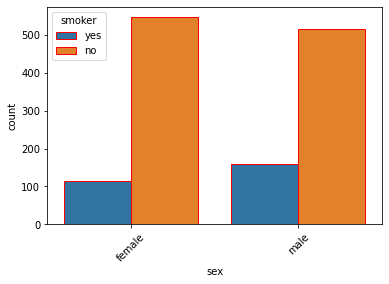

In [402]:
sns.countplot(x='sex',data=df,hue='smoker',edgecolor='red')
plt.xticks(rotation=45)
plt.show()

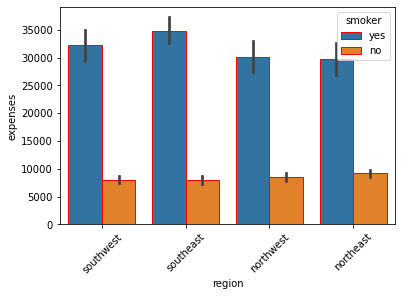

In [403]:
sns.barplot(x='region',y='expenses',data=df,hue='smoker',edgecolor='red')
plt.xticks(rotation=45)
plt.show()

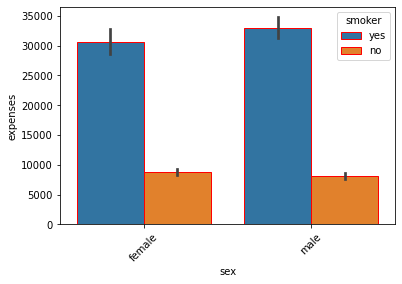

In [404]:
sns.barplot(x='sex',y='expenses',data=df,hue='smoker',edgecolor='red')
plt.xticks(rotation=45)
plt.show()

 - As we can see above No particular trend can be established between sex and expenses.

<Figure size 2160x1800 with 0 Axes>

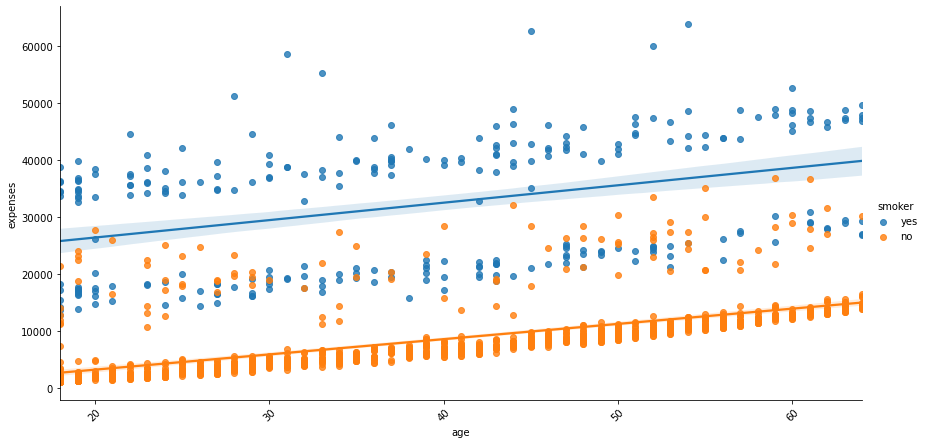

In [405]:
plt.figure(figsize=(30,25))
sns.lmplot(x='age',y='expenses',data=df,hue='smoker',aspect=2,height=6)
plt.xticks(rotation=45)
plt.show()

 - As can we see above, the continous columns of Age is compared with expenses and it can be found that the smoker expenses are higher in comparison to non smokers.

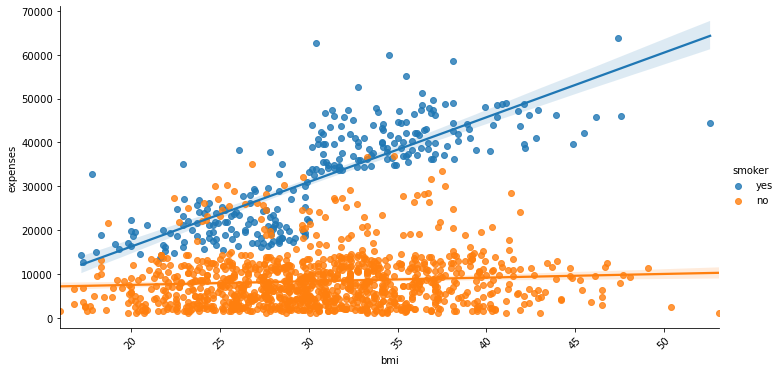

In [406]:
#plt.figure(figsize=(30,25))
sns.lmplot(x='bmi',y='expenses',data=df,hue='smoker',aspect=2)
plt.xticks(rotation=45)
plt.show()

 - As  we can  see above, the continous columns of  Bmi is compared with expenses and it can be found that the smoker expenses are higher in comparison to non smokers.

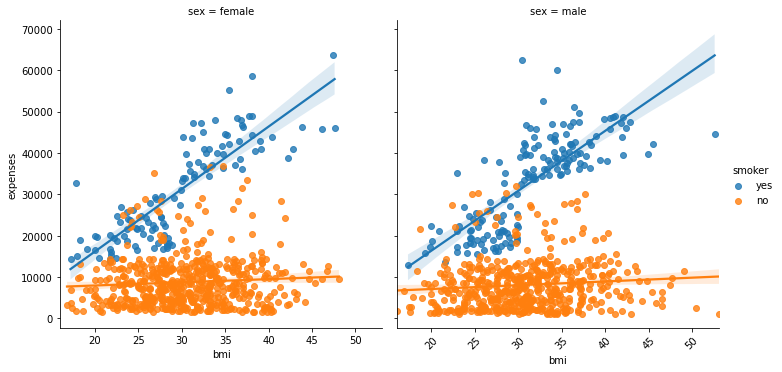

In [407]:
sns.lmplot(x='bmi',y='expenses',hue='smoker' ,col='sex',data=df)
plt.xticks(rotation=45)
plt.show()

# Numerical Analysis

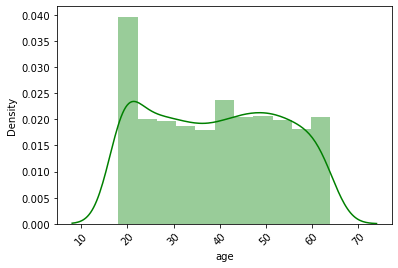

In [408]:
sns.distplot(df['age'] , color="green")
plt.xticks(rotation=45)
plt.show()

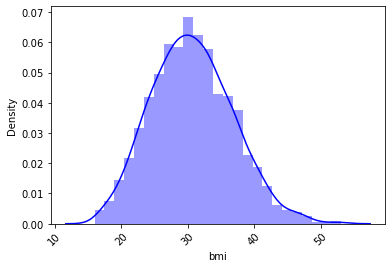

In [409]:
sns.distplot(df['bmi'] , color="blue")
plt.xticks(rotation=45)
plt.show()

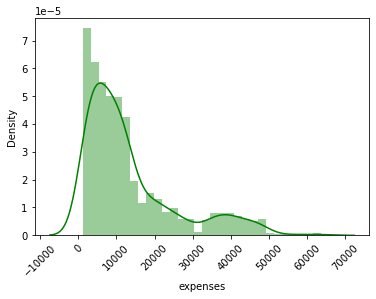

In [410]:
sns.distplot(df['expenses'] , color="green")
plt.xticks(rotation=45)
plt.show()

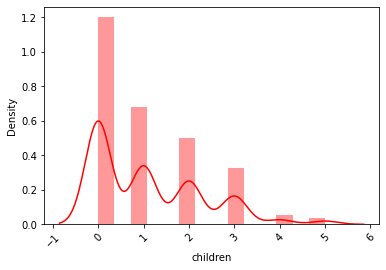

In [411]:
sns.distplot(df['children'] , color="red")
plt.xticks(rotation=45)
plt.show()

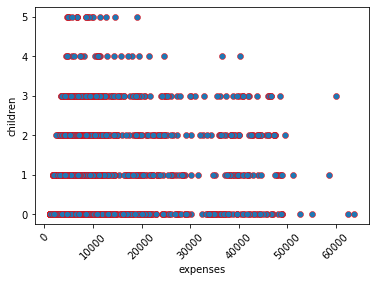

In [412]:
sns.scatterplot(x='expenses',data=df,y='children',edgecolor='red')
plt.xticks(rotation=45)
plt.show()

 - The number of persons having more than 3 children is comparatively lesser than those have less than 3 children, no trend is being observed that people with lesser children have lesser medical expense.

# Numerical and categorical  Analysis

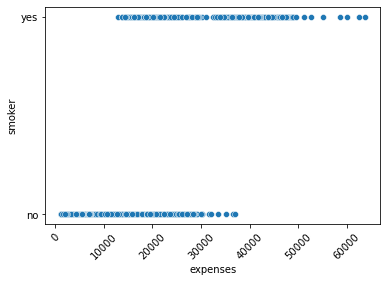

In [413]:
sns.scatterplot(x='expenses',data=df,y='smoker')
plt.xticks(rotation=45)
plt.show()

 - Even though the data has way more number of non smokers than the number of smokers, it is observed that smokers have higher medical expenses, this feature would definitely be useful while predicting premium.

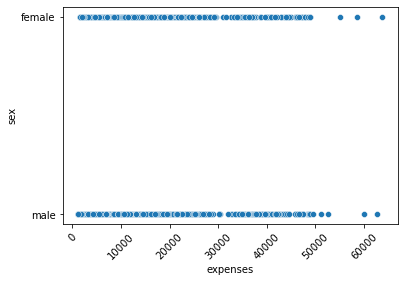

In [414]:
sns.scatterplot(x='expenses',data=df,y='sex')
plt.xticks(rotation=45)
plt.show()

 - No particular trend can be established between sex and expenses.

#  Checking Outliers

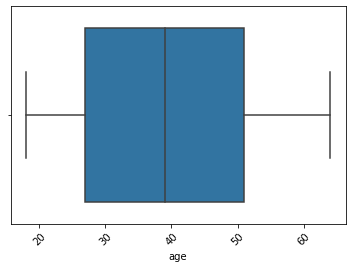

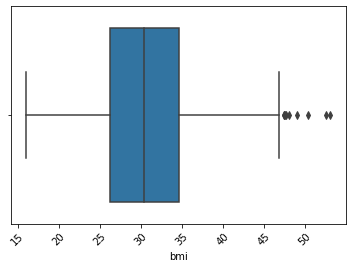

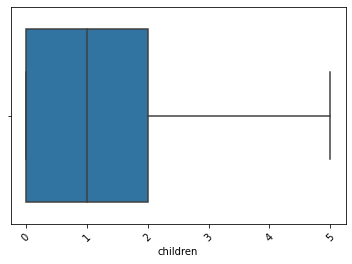

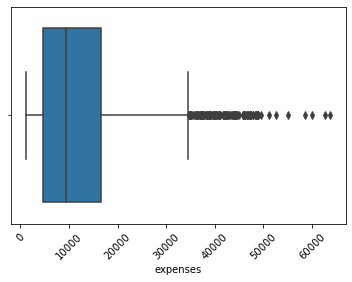

In [415]:
for i in df.select_dtypes(np.number):
    sns.boxplot(df[i])
    plt.xticks(rotation=45)
    plt.show()

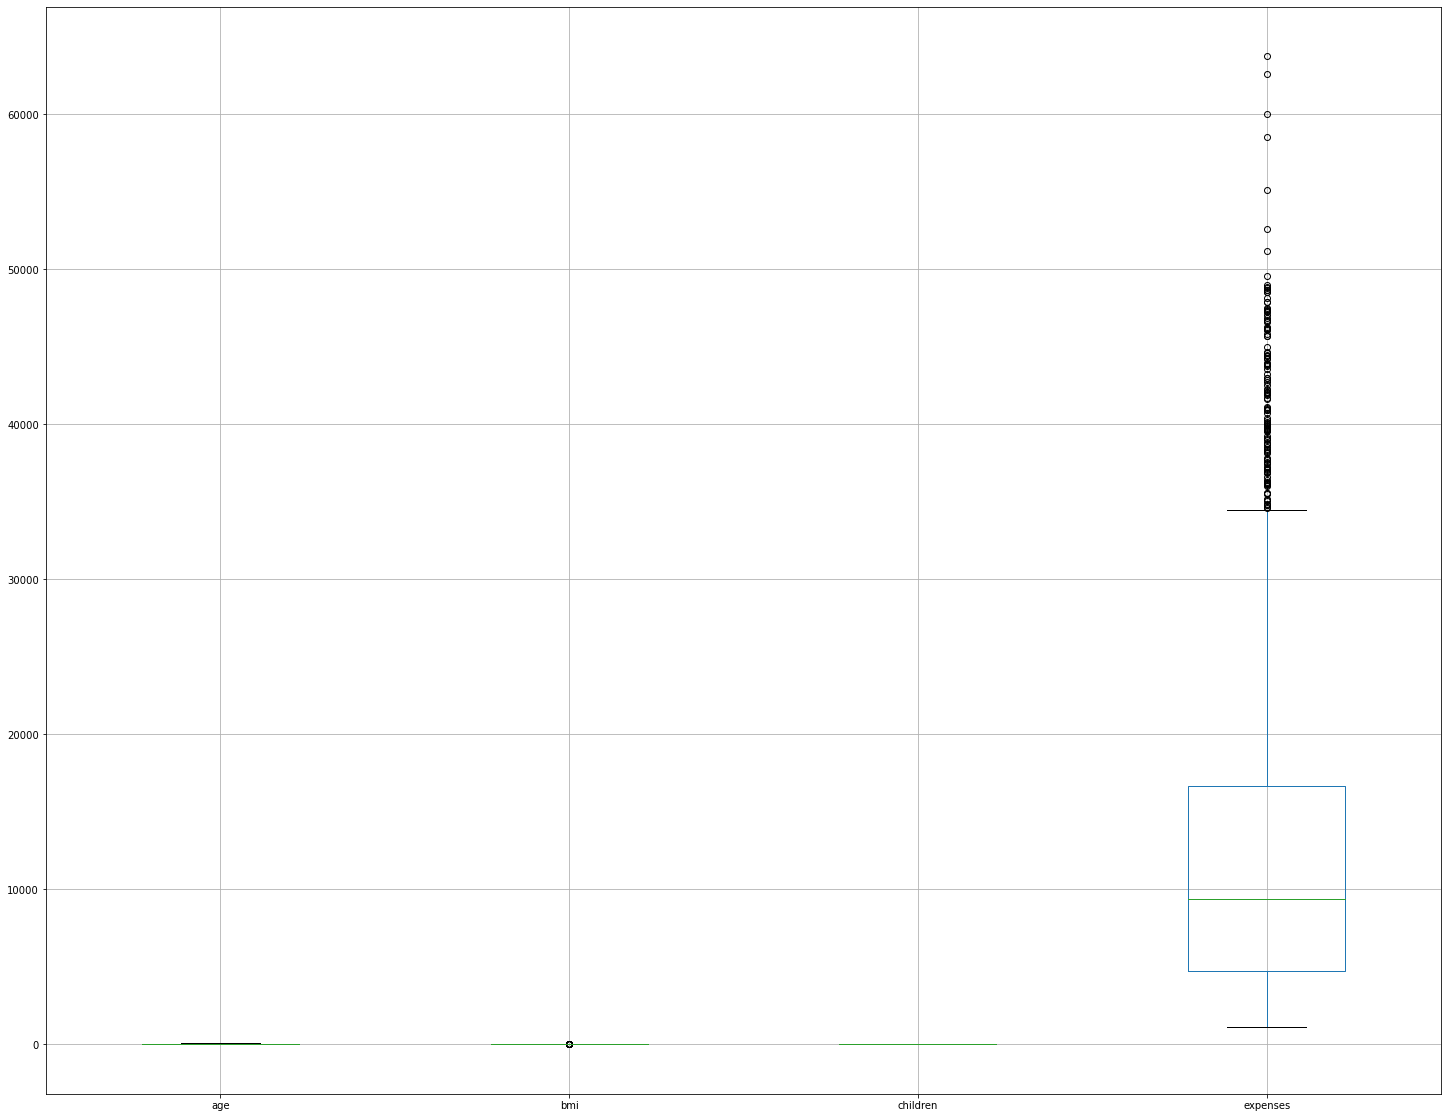

In [416]:
plt.figure(figsize=(25,20))
df.boxplot()
plt.show()

 - As we can see in the above diag there is  outliers present in bmi and expenses column.

In [417]:
num_df=df.select_dtypes(np.number)
num_df.head()

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


In [418]:
col=num_df.columns
mel_num=pd.melt(df,value_vars=col)
mel_num.head()

,variable,value
0,age,19.0
1,age,18.0
2,age,28.0
3,age,33.0
4,age,32.0


<Figure size 1080x1080 with 0 Axes>

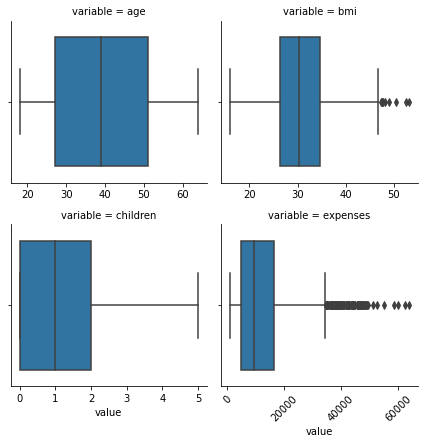

In [419]:
plt.figure(figsize=(15,15)) #checking for outliers on num columns.
grid=sns.FacetGrid(mel_num,col='variable',col_wrap=2,sharex=False,sharey=False)
grid=grid.map(sns.boxplot,'value')
plt.xticks(rotation=45)
plt.show()

## Checking Correlation of Features

In [420]:
df.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


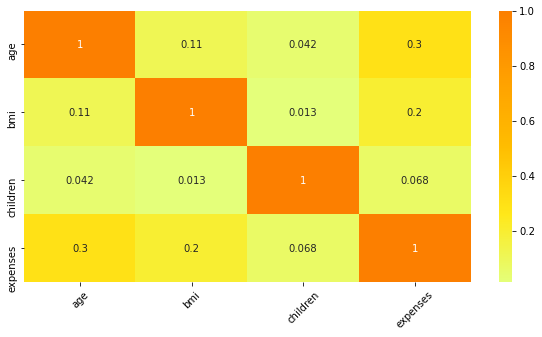

In [421]:
plt.figure(figsize=(10,5)) #Checking for corr
sns.heatmap(df.corr(),cmap='Wistia',annot=True)
plt.xticks(rotation=45)
plt.show()                         

 - There seems to be good relation between age and bmi with expenses.

# Label Encodeing

In [422]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
LE= LabelEncoder()

In [423]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [424]:
for feature in df_cat:
    df[feature] = LabelEncoder().fit_transform(df[feature])

In [426]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


# Creating blank Data sets for matrics

In [427]:
df_metrics=pd.DataFrame(columns=['R2','Adj_R2','Train_rmse','Test_rsme'])

In [428]:
df_metrics=pd.DataFrame(columns=['model','R2','Adj_R2','Train_rmse','Test_rsme'])
def update_metrics(m,a,b,c,d,i):
    df_metrics.loc[i]=(m,a,b,c,d)

In [429]:
update_metrics(4,5,8,6,7,0)

In [430]:
df_metrics

,model,R2,Adj_R2,Train_rmse,Test_rsme
0,4,5,8,6,7


### Seperating Independent and Dependent variable

In [431]:
X=df[['age', 'bmi', 'children', 'smoker']]
y=df['expenses']

### Spliting data into train and test

In [432]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [433]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 4) (936, 4) (402, 4)


# Base Model

In [434]:
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)
model=sm.OLS(y_train,X_train).fit()

In [435]:
y_pred = model.predict(X_test)


In [436]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
score=r2_score(y_test,y_pred)

In [437]:
score

0.7648631607743366

In [438]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     666.9
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          1.60e-271
Time:                        18:14:10   Log-Likelihood:                -9473.9
No. Observations:                 936   AIC:                         1.896e+04
Df Residuals:                     931   BIC:                         1.898e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.199e+04   1137.245    -10.543      0.000   -1.42e+04   -9757.752
age          245.6292     14.321     17.151      0.000     217.524     273.735
bmi          330.4152     32.692     10.107      0.000     266.257     394.573
children     615.1163    162.972      3.774      0.000     295.281     934.951
smoker      2.336e+04    489.939     47.684      0.000    2.24e+04    2.43e+04
==============================================================================
Omnibus:                      205.802   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              441.886
Skew:                           1.219   Prob(JB):                     1.11e-96
Kurtosis:                       5.321   Cond. No.                         296.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [439]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
q=mean_squared_error(y_train,y_pred_train)# finding mse because train data where the model has seen the data.
c=mean_squared_error(y_test,y_pred_test)

In [440]:
update_metrics('Full Model',model.rsquared,model.rsquared_adj,np.sqrt(q),np.sqrt(c),0)

In [441]:
df_metrics

,model,R2,Adj_R2,Train_rmse,Test_rsme
0,Full Model,0.741289,0.740178,6019.53,6165


# Perform Standardisation

In [442]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Find the best parameters using GridSearchCV

In [443]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'max_depth': 4, 'min_samples_split': 10}


# Decision Tree Regressor

In [444]:

model = DecisionTreeRegressor(random_state=0)

In [445]:
model = DecisionTreeRegressor(max_depth=4, min_samples_split=20)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_split=20)

In [446]:
y_pred = model.predict(X_test)

In [447]:
r2_score(y_test,y_pred)

0.8739494974632372

In [448]:
print("Model Accuracy: %.3f" % model.score(X_test, y_test))

Model Accuracy: 0.874


# Model using Gradient Boosting Regressor

In [449]:
from sklearn.ensemble import GradientBoostingRegressor

In [450]:
param_test = {'learning_rate':[0.020,0.015,0.01], 'n_estimators':[250,500,750]}
    
gs = GridSearchCV(estimator =GradientBoostingRegressor(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,loss = 'ls',criterion = 'mse'), 
            param_grid = param_test, n_jobs=4,cv=5,verbose = True)    
    
gs.fit(X_train,y_train)
gs.cv_results_, gs.best_score_, gs.best_params_    
       

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    8.2s finished


({'mean_fit_time': array([0.23121219, 0.42347798, 0.76358876, 0.2589201 , 0.48499374,
         0.74490895, 0.25846877, 0.5088191 , 0.80678706]),
  'std_fit_time': array([0.02577005, 0.02309706, 0.02220083, 0.02461671, 0.02578132,
         0.04955129, 0.05425414, 0.01914488, 0.05081587]),
  'mean_score_time': array([0.00201216, 0.00258207, 0.00505824, 0.00093145, 0.00204029,
         0.00428357, 0.00323038, 0.00539446, 0.00780172]),
  'std_score_time': array([0.00311211, 0.00217958, 0.00153529, 0.00096082, 0.00173217,
         0.00174408, 0.0039564 , 0.0040398 , 0.00326364]),
  'param_learning_rate': masked_array(data=[0.02, 0.02, 0.02, 0.015, 0.015, 0.015, 0.01, 0.01,
                     0.01],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_n_estimators': masked_array(data=[250, 500, 750, 250, 500, 750, 250, 500, 750],
               mask=[False, False, False, Fals

In [451]:
param_test2 = {'max_depth':[2,4,6,8], 'min_samples_split':[2,5,8,10],'min_samples_leaf':[1,2,5]}
    
gs =GridSearchCV(estimator =GradientBoostingRegressor(learning_rate=0.015, n_estimators=250, subsample=1,loss = 'ls',criterion = 'mse'), 
            param_grid = param_test2, n_jobs=4,cv=5,verbose = True)

gs.fit(X_train,y_train)
gs.cv_results_, gs.best_score_, gs.best_params_   


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   12.8s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   17.4s finished


({'mean_fit_time': array([0.22834878, 0.26787062, 0.35863938, 0.54256163, 0.18039861,
         0.13242021, 0.13900461, 0.1925281 , 0.15072379, 0.21035709,
         0.18169761, 0.19837141, 0.25834465, 0.21211782, 0.25441194,
         0.2261724 , 0.24764357, 0.18883314, 0.20531144, 0.21338453,
         0.26442442, 0.27025309, 0.27519331, 0.27828927, 0.35895572,
         0.34034705, 0.28719239, 0.26264973, 0.31091256, 0.2572051 ,
         0.25281525, 0.25219083, 0.25913014, 0.34865193, 0.32204533,
         0.2745295 , 0.34567385, 0.35186949, 0.35934238, 0.30798869,
         0.34354429, 0.42473927, 0.38171759, 0.40499883, 0.36980166,
         0.36015778, 0.45606766, 0.32885284]),
  'std_fit_time': array([0.03419663, 0.0488382 , 0.14787243, 0.07104482, 0.02496704,
         0.01366634, 0.01314259, 0.03405171, 0.02740193, 0.02003222,
         0.00677759, 0.02107244, 0.02273059, 0.01733075, 0.02638734,
         0.01768612, 0.00960397, 0.01087423, 0.02041911, 0.02319417,
         0.02707868, 0.

In [452]:

# Create an instance of gradient boosting regressor

gbr =GradientBoostingRegressor(learning_rate=0.015, n_estimators=250, max_depth=4,
                               min_samples_leaf=5,
                               min_samples_split=5,subsample=1,loss = 'ls',criterion = 'mse')


# Fit the model

gbr.fit(X_train, y_train)

# Print Coefficient of determination R^2

#print("Model Accuracy: %.3f" % gbr.score(X_test, y_test))
print("Accuracy score (training): {0:.3f}".format(gbr.score(X_train, y_train)))

gbr.fit(X_test, y_test)
print("Accuracy score (test): {0:.3f}".format(gbr.score(X_test, y_test)))

Accuracy score (training): 0.883
Accuracy score (test): 0.923


 - Conclusion:Gradient boast regression has the highest accuracy of 92%.